#### 【 지도학습 - 선형 모델: 다항회귀 】

- 주__제 : 농어의 길이에 따른 무게 예측 모델 구현
- 데이터 : ../Data/fish.csv
- 종__류 : 지도학습 - 수치값 예측 즉, 회귀
- 방__법 : 선형모델을 기반으로 구현 => LinearRegression

[1] 모듈 로딩 및 데이터 준비 <hr>

[1-1] 모듈 로딩

In [32]:
## [1-1] 모듈 로딩
## 기본 모듈
import numpy as np
import pandas as pd

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 전처리 관련
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split


## ML 학습 알고리즘 관련
from sklearn.linear_model import LinearRegression

## ML 성능평가 관련
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error

##### [1-2] 실습 데이터 준비

In [33]:
## ================================================
## [1-2] 데이터 준비 : 74행 ~ 129행 , Weight, Length
## ================================================
## 데이터 파일
DATA_FILE = '../Data/fish.csv'

## 데이터 추출
fishDF = pd.read_csv(DATA_FILE,
                     usecols=[1,2], skiprows=73, nrows=55,
                     header=None, names=['Weight', 'Length'])

print(fishDF.shape, fishDF.ndim)
display( fishDF.head(2), fishDF.tail(2) )

(55, 2) 2


,Weight,Length
0,5.9,8.4
1,32.0,13.7


,Weight,Length
53,1100.0,43.0
54,1000.0,43.5


##### [2] 데이터 전처리 <HR>

In [40]:
## [2-1] 피쳐와 타겟 분리
featureDF = fishDF[fishDF.columns[1:2]]
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF : {featureDF.shape},  targetSR : {targetSR.shape}')

featureDF : (55, 1),  targetSR : (55,)


In [35]:
## [2-2] 학습용/테스트용 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    test_size=0.2,
                                                    random_state=10)

print(f'[TRAIN] x_train : {x_train.shape},  y_train : {y_train.shape}')
print(f'[TEST]  x_test  : {x_test.shape},   y_test  : {y_test.shape}')

[TRAIN] x_train : (44, 1),  y_train : (44,)
[TEST]  x_test  : (11, 1),   y_test  : (11,)


In [36]:
## [2-3] DT계열에 제외한 선형모델, 거리기반 모델 등은 피쳐 스케일링 진행
##       => 피쳐 1개로 스케일링 X

[3] 일반 학습 진행 + 성능평가 <hr>

corr_ : 0.9560765731662928


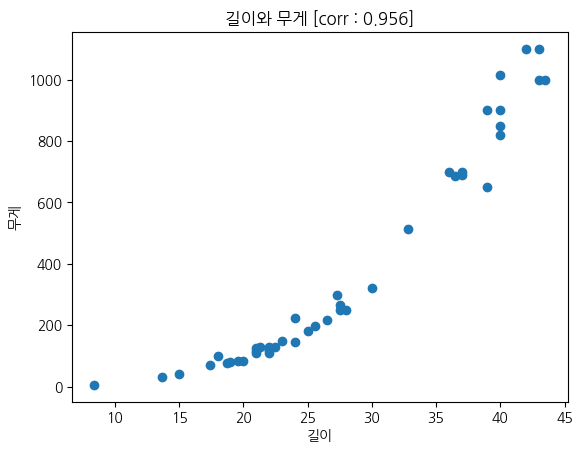

In [ ]:
## 데이터 시각화
corr_ = fishDF.corr()['Length'].iloc[0]

plt.plot(x_train, y_train, 'o')
plt.xlabel('길이')
plt.ylabel('무게')
plt.title(f'길이와 무게 [corr : {corr_:.3f}]')
plt.show()

In [49]:
## ================================================
## [3-1] 일반 선형 모델
## ================================================
lrModel = LinearRegression()
lrModel.fit(x_train, y_train)

## ==> 해당 데이터셋 규칙/패턴 수식화 : 선형식
print(f'가중치 : {lrModel.coef_}, 절편 : {lrModel.intercept_}')

## ================================================
## [3-2] 일반 선형 모델 평가 진행
## ================================================
train_score = lrModel.score(x_train, y_train)
test_score  = lrModel.score(x_test, y_test)

print(f'[TRAIN] {train_score}')
print(f'[TEST]  {test_score}')

가중치 : [36.56690772], 절편 : -633.8079057814562
[TRAIN] 0.918048427073215
[TEST]  0.8820589493080677


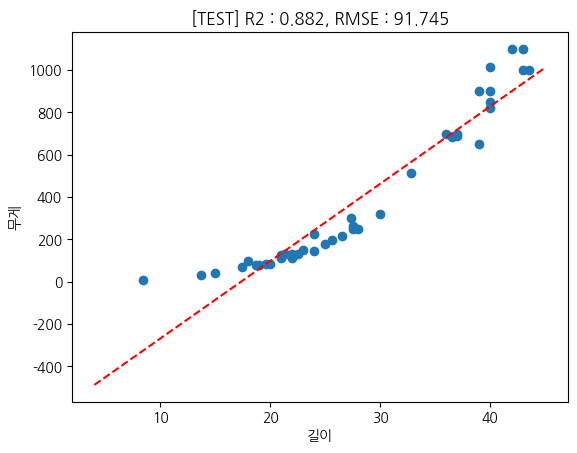

In [56]:
## ================================================
## [3-3] 일반 선형 모델 시각화
## ================================================
## => 선형식 데이터
new_data=[[4], [30], [45]]
newDF = pd.DataFrame(new_data, columns=fishDF.columns[1:2])
preSR = lrModel.predict(newDF)

## => 회귀 모델 성능지표
pre_weights = lrModel.predict(x_test)
r2_ = r2_score(y_test, pre_weights)
rmse_ = root_mean_squared_error(y_test, pre_weights)

plt.plot(x_train, y_train, 'o')
plt.plot(new_data, preSR, 'r--')
plt.xlabel('길이')
plt.ylabel('무게')
plt.title(f'[TEST] R2 : {r2_:.3f}, RMSE : {rmse_:.3f}')
plt.show()

[4] 피쳐 생성 + 학습 진행 + 성능평가 <hr>

In [57]:
## [4-1] 피쳐 생성 : 기존 피쳐 조합, 제곱항으로 피쳐 생성
poly         = PolynomialFeatures(degree=2)     # 기본값
poly_x_train = poly.fit_transform(x_train)

print(f'[피쳐 개수] x_train : {x_train.shape} ===> poly_x_train : {poly_x_train.shape}')

[피쳐 개수] x_train : (44, 1) ===> poly_x_train : (44, 3)


In [ ]:
## [4-2] 학습 진행
plrModel = LinearRegression()
plrModel.fit(poly_x_train, y_train)